# Exploring the Enron Emails Dataset

The Enron corpus is the largest public domain database of real e-mails in the world.  This version of the dataset contains over 500,000 emails from about 150 users, mostly senior management at Enron.  The corpus is valuable for research in that it provides a rich example of how a real organization uses e-mails and has had a widespread influence on today's software for fraud detection.  Visit [here](https://en.wikipedia.org/wiki/Enron_scandal) to learn more about the Enron scandal.  

The purpose of this project is to explore the data to check for fraud and to see what sort of information was leaked in the e-mails.  Checkout the data set [here](https://www.cs.cmu.edu/~./enron/).  

## 1. Looking At The Data

In [237]:
import pandas as pd
import numpy as np
from IPython.display import display

filepath = "data/emails.csv"
# Read the data into a pandas dataframe called emails
emails = pd.read_csv(filepath)
emails = emails.iloc[:100] # testing 
print("Successfully loaded {} rows and {} columns!".format(emails.shape[0], emails.shape[1]))
# Print column names
print(emails.columns)
# Store column headers 
headers = [header for header in emails.columns]
# Print the first 5 rows of the dataset
print(display(emails.head()))

Successfully loaded 100 rows and 2 columns!
Index([u'file', u'message'], dtype='object')


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


None


Numpy and pandas were imported, then the csv file containing the e-mails was read into a dataframe called **`emails`**.  The reading may take a while due to the size of the file.  Next, the shape of the dataset, column names and a sample of five rows within the dataset were printed.  There are 517,401 rows and 2 columns.  

**`file`** - contains the original directory and filename of each email. The root level of this path is the employee (surname first followed by first name initial) to whom the emails belong. 

**`message`** - contains the email text

### E-mails are MIME formatted

Here is a sample of the standard e-mail found in the data.  It contains a list of headers and a message body.  Note that there is a header label called "Mime-Version", which signifies that the e-mails in this dataset are MIME formatted.  MIME stands for Multipurpose Internet Mail Extensions and virtually all human-written email is transmitted in MIME format.  Python has a built in [MIME handling package](https://docs.python.org/2/library/email.html) and this is what will be used to dissect the data needed out of each e-mail.

In [186]:
print(emails.loc[0]["message"])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


In [143]:
print len(emails["file"].value_counts())

100000


## 2. Data Cleaning

Here are the list of things that needs to be performed on the data:
* Check for missing values
* Tokenization
* Feature Engineering
* Remove unwanted characters 

### Adding new columns

In [286]:
# MIME handling package
import email

# Used to store data for new features
def add_columns(df, column):
    header_data = {}
    for item in df[column]: 
        # Return a message object structure from a string
        e = email.message_from_string(item)
        # A list of tuples containing the header keys and values
        header_list = e.items()
        # Add data to dictionary 
        for key, value in header_list:
            if key in header_data:
                values = header_data.get(key)
                values.append(value)
                header_data[key] = values
            else:
                header_data[key] = [value]
                
    for key, value in header_data.items():
        df[key] = pd.Series(value)
    return df

emails = add_columns(df = emails, column = "message")

### Here is a summary of the new `emails` dataset containing all the new columns.  

In [287]:
print(emails.shape)
print(display(emails.head(3)))

(100, 19)


,file,message,Cc,X-cc,From,Subject,X-Folder,Content-Transfer-Encoding,X-bcc,Bcc,To,X-Origin,X-FileName,X-From,Date,X-To,Message-ID,Content-Type,Mime-Version
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"john.lavorato@enron.com, hunter.shively@enron.com",,phillip.allen@enron.com,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",7bit,,"john.lavorato@enron.com, hunter.shively@enron.com",tim.belden@enron.com,Allen-P,pallen (Non-Privileged).pst,Phillip K Allen,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Tim Belden <Tim Belden/Enron@EnronXGate>,<18782981.1075855378110.JavaMail.evans@thyme>,text/plain; charset=us-ascii,1.0
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,NaN,,phillip.allen@enron.com,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",7bit,,NaN,john.lavorato@enron.com,Allen-P,pallen (Non-Privileged).pst,Phillip K Allen,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",John J Lavorato <John J Lavorato/ENRON@enronXg...,<15464986.1075855378456.JavaMail.evans@thyme>,text/plain; charset=us-ascii,1.0
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,NaN,,phillip.allen@enron.com,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,7bit,,NaN,leah.arsdall@enron.com,Allen-P,pallen.nsf,Phillip K Allen,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Leah Van Arsdall,<24216240.1075855687451.JavaMail.evans@thyme>,text/plain; charset=us-ascii,1.0


None


In [294]:
print (emails.loc[17]["X-Folder"])

\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail


### Missing Values

The `emails` dataframe was checked for missing values.  In this case, there were no missing values.

In [145]:
# Check for null values
null_values = emails.isnull().values.any()
if null_values == False: 
    print "No NaN values"
else:
    print null_values

True


### Introducing the Bag-of-words model

For the computer to make inferences of the e-mails, it has to be able to interpret the text by making a numerical representation of it.  One way to do this is by using something called a [**Bag-of-words model**](https://en.wikipedia.org/wiki/Bag-of-words_model).  It will take the e-mails as a string and convert it into a numerical vector to show the frequency that each unique word appears over the entire dataset.  The first step in creating a Bag-of-words model is called tokenization.  By tokenizing each e-mail, each string is split into a list of words. 

### Tokenization

In this step, the MIME handling python package mentioned earlier was used to extract both the headers and the messages found within each e-mail.  The data found within the headers section of each e-mail will be added to the `emails` dataframe as new features.  They are stored in the `header_data` dictionary.  All tokens are stored in `tokenized_messages` for further processing.

**Why lowercase the message body?**

Because a human may know that "Forecast" and "forecast" means the same thing, but the computer does not know this.  Also, while building the matrix using the bag-of-words model, lowercasing also reduces the chance of the same word being duplicated and entered as a separate word.

In [238]:
# Returns a list of tokens
def tokenize(df, column):
    tokenized_messages = []
    for item in df[column]:
        # Return a message object structure from a string
        e = email.message_from_string(item)    
        # get message body  
        message_body = e.get_payload()
        # lower case messages
        message_body = message_body.lower()
        # split message into tokens
        tokens = message_body.split(" ")
        tokenized_messages.append(tokens)
    return tokenized_messages

#tokenized_messages = tokenize(emails, "message")

# Returns a list of tokens
def get_messages(df, column):
    messages = []
    for item in df[column]:
        # Return a message object structure from a string
        e = email.message_from_string(item)    
        # get message body  
        message_body = e.get_payload()
        # lower case messages
        message_body = message_body.lower()
        # split message into tokens
        #tokens = message_body.split(" ")
        messages.append(message_body)
    return messages

messages = get_messages(emails, "message")
print messages

['here is our forecast\n\n ', "traveling to have a business meeting takes the fun out of the trip.  especially if you have to prepare a presentation.  i would suggest holding the business plan meetings here then take a trip without any formal business meetings.  i would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nas far as the business meetings, i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  too often the presenter speaks and the others are quiet just waiting for their turn.   the meetings might be better if held in a round table discussion format.  \n\nmy suggestion for where to go is austin.  play golf and rent a ski boat and jet ski's.  flying somewhere takes too much time.\n", 'test successful.  way to go!!!', 'randy,\n\n can you send me a schedule of the salary and level of everyone in the \nscheduling group.  plus your thoughts on any changes that

###  Remove unwanted HTML Markup, punctuations and emoticons

In [239]:
unwanted_characters = [",", ":", ";", ".", "'", '"', "’", "?", "/", "-", "+", "&", 
                       "<", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", ">", "@", 
                       "(", ")", '\\', "~", "{", "}", "*", "^", "!", "\n"]

import re
def remove_special_chars(data):
    cleaned_tokenized_emails = []
    for item in tokenized_messages:
        tokens = []
        for token in item:
            text = re.sub(r'\W', "", token)
            tokens.append(text)
        cleaned_tokenized_emails.append(tokens)
    return cleaned_tokenized_emails

def remove_special_chars2(data):
    cleaned_msg = []
    for item in data:
        text = re.sub(r'\W', " ", item)
        cleaned_msg.append(text)
    return cleaned_msg
cleaned_msg = remove_special_chars2(messages)

In [209]:
print cleaned_msg

['here is our forecast   ', 'traveling to have a business meeting takes the fun out of the trip   especially if you have to prepare a presentation   i would suggest holding the business plan meetings here then take a trip without any formal business meetings   i would even try and get some honest opinions on whether a trip is even desired or necessary   as far as the business meetings  i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not   too often the presenter speaks and the others are quiet just waiting for their turn    the meetings might be better if held in a round table discussion format     my suggestion for where to go is austin   play golf and rent a ski boat and jet ski s   flying somewhere takes too much time  ', 'test successful   way to go   ', 'randy    can you send me a schedule of the salary and level of everyone in the  scheduling group   plus your thoughts on any changes that need to b

## 3. Construct a Bag-of-words model

### Count words

Now that the data has been cleaned, it is time to construct a bag-of-words model to get the word counts.  Scikit-learn has a `CountVectorizer` class that is able to do just that.  It takes in a list of strings, in our case words, and outputs a dictionary mapping words as keys to their respective integer indices.  

In [240]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
docs = np.array(cleaned_msg)
bag = count.fit_transform(docs)
#print(count.vocabulary_)
vocab = count.vocabulary_

Here we convert the dictionary to a feature vector, where each index position corresponds to the values found in the CountVectorizer vocabulary.  

In [241]:
#print vocab
bag = bag.toarray()
print(bag[0][1076])
print len(bag[0])
print(bag[1])
print ""
print(bag[2])

1
2694
[0 0 0 ..., 0 0 0]

[0 0 0 ..., 0 0 0]


### Word Relevance using term frequency-inverse document frequency

Apply the Term frequency-inverse document frequency (tf-df) to downweight words that appear frequently in the e-mails but do not contain useful information.  Sci-kit learn has a transformer called the `TfidTransformer` to do this.  The `TfidTransformer` also normalizes the tf-idfs using L2-normalization.  Using L2-normalization helps to penalize the weight of the tf-dfs and prevent overfitting

In [242]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
bag = tfidf.fit_transform(count.fit_transform(docs)).toarray()

### PCA

In [243]:

from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(bag)


In [264]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=2, copy=True, whiten=False)
pca.fit(df)
reduced_data = pca.transform(df)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
print(reduced_data.loc[0]["Dimension 1"]) 

-0.0359813977238


## Clusters

In [282]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def get_silhouette_score(df):
    high_score = 0
    cluster_size = 0
    for i in range(2, 10):
        # fit cluster to reduced data
        clusterer = KMeans(n_clusters = i, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',random_state=0, copy_x=True, n_jobs=1)
        clusterer.fit(df)

        # predict cluster for each data point
        preds = clusterer.predict(df)

        # TODO: Find the cluster centers
        centers = clusterer.cluster_centers_

        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen

        score = silhouette_score(df, preds)
        if score > high_score:
            high_score = score
            cluster_size = i
    return high_score, cluster_size, preds, centers

high_score, cluster_size, preds, centers = get_silhouette_score(reduced_data)
print(cluster_size)

import matplotlib.pyplot as plt
%matplotlib inline
print(len(reduced_data))
#plt.scatter(reduced_data, preds, s =50, c = 'blue', marker = 's')
#plt.show()
print(preds)

3
100
[5 0 5 0 5 5 5 5 5 2 5 2 8 8 2 5 3 5 6 1 2 5 0 6 6 4 4 3 0 5 3 3 6 2 3 3 5
 0 2 2 6 4 0 5 0 0 0 2 7 5 2 4 0 2 2 0 6 4 1 0 0 1 5 8 7 5 2 1 7 2 2 2 1 5
 1 2 5 5 2 5 3 2 0 5 2 5 0 5 0 5 5 2 2 6 7 2 2 1 2 2]


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.545857605038


TypeError: unhashable type

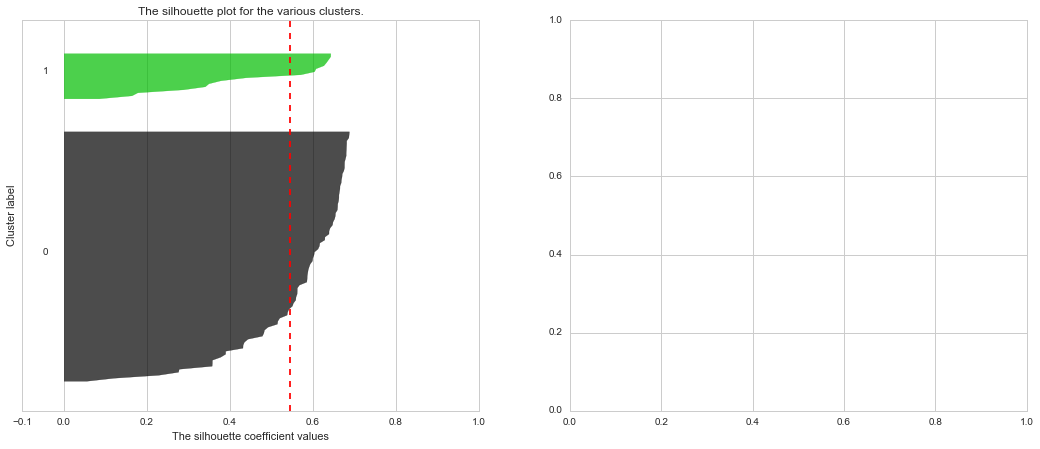

In [276]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distict cluster and 3 clusters placed close
# together.
range_n_clusters = [2, 3, 4, 5, 6]
X = reduced_data
y = preds
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### Visualizing most relevant words

In [155]:
frequency = []
keys = []

for key, value in vocab.items():
    tally = bag[0][value]
    frequency.append(tally)
    keys.append(key)

words = pd.DataFrame(data = frequency, index = keys, columns = ["frequency"])
print words.head(5)

                          frequency
capscopyright          9.368033e-07
chudson                8.431230e-06
cancelledthankssandra  9.368033e-07
imageimagecompaq       1.873607e-06
tradesten              4.684017e-07


AttributeError: 'numpy.ndarray' object has no attribute 'get'

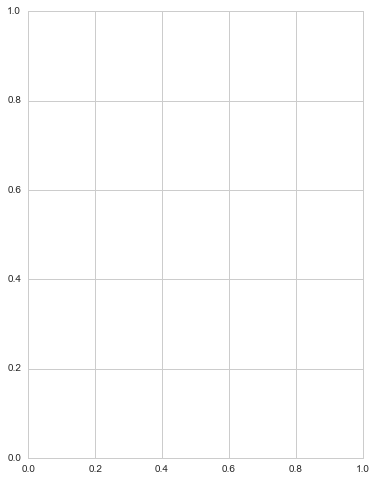

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 8))

sns.countplot(x = frequency, color='b')
sns.plt.show()